In [6]:
import tensorflow as tf
import os
import cv2
import imghdr

In [76]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [77]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [78]:
import numpy as np
from matplotlib import pyplot as plt

In [79]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 489 files belonging to 3 classes.


In [80]:
data_iterator = data.as_numpy_iterator()

In [81]:
batch = data_iterator.next()

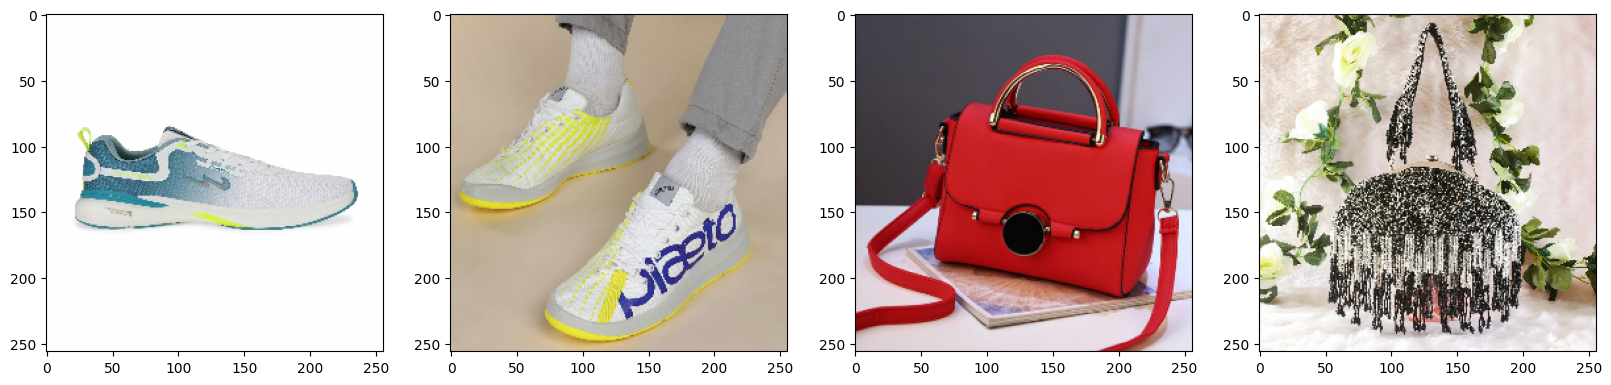

In [83]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    #ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
test_size

1

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(3, activation='softmax'))  # 3 units for 3 classes, using softmax

In [28]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 11s 882ms/step - loss: 1.3366 - accuracy: 0.3920 - val_loss: 1.0344 - val_accuracy: 0.5938
Epoch 2/20
11/11 [==============================] - 11s 865ms/step - loss: 0.9770 - accuracy: 0.5227 - val_loss: 0.9496 - val_accuracy: 0.5625
Epoch 3/20
11/11 [==============================] - 11s 877ms/step - loss: 0.8478 - accuracy: 0.6250 - val_loss: 0.7149 - val_accuracy: 0.7604
Epoch 4/20
11/11 [==============================] - 11s 873ms/step - loss: 0.7562 - accuracy: 0.6960 - val_loss: 0.6652 - val_accuracy: 0.7292
Epoch 5/20
11/11 [==============================] - 11s 867ms/step - loss: 0.6314 - accuracy: 0.7472 - val_loss: 0.5516 - val_accuracy: 0.8021
Epoch 6/20
11/11 [==============================] - 11s 880ms/step - loss: 0.5066 - accuracy: 0.8097 - val_loss: 0.4811 - val_accuracy: 0.7188
Epoch 7/20
11/11 [==============================] - 11s 878ms/step - loss: 0.4012 - accuracy: 0.8438 - val_loss: 0.3455 - val_accuracy: 0.9271

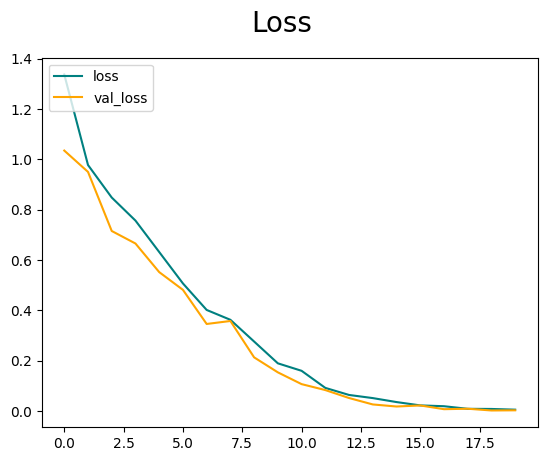

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

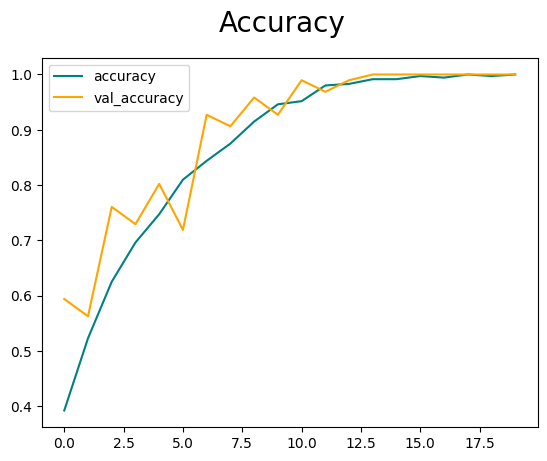

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
# Evaluate the model on the test set
evaluation = model.evaluate(test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

1/1 [==============================] - 2s 2s/step - loss: 0.0081 - accuracy: 1.0000
Test Loss: 0.008055745624005795
Test Accuracy: 1.0


In [85]:
image_path = 'download.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, (256, 256))  # Resize to match the input size of your model
img = img / 255.0  # Normalize pixel values


In [86]:
# Make predictions
predictions = model.predict(np.expand_dims(img, axis=0))

1/1 [==============================] - 0s 33ms/step


In [87]:
# Interpret the predictions
predicted_class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
confidence_score = predictions[0][predicted_class_index]

In [88]:
# Map class index to the corresponding label
class_labels = {2: 'sandal', 1: 'shoe', 0: 'bag'}
predicted_class_label = class_labels[predicted_class_index]


In [89]:
# Print the predicted class label and confidence score
print(f"The model predicts it's a {predicted_class_label} with confidence: {confidence_score}")

The model predicts it's a shoe with confidence: 0.9321252703666687


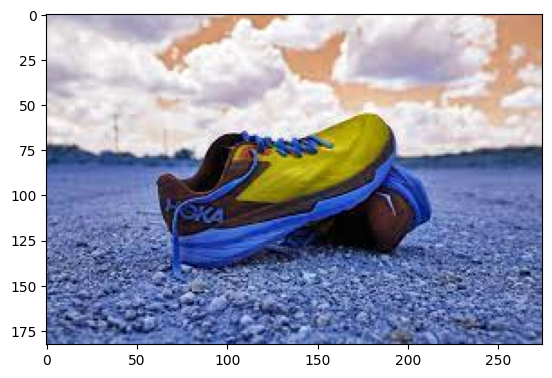

In [84]:
img = cv2.imread('download.jpg')
plt.imshow(img)
plt.show()